# Text Mining on Publishing Data of Turkish academics 

In this case study we are going to focus on an easy cae study on text mining. We are going to learn

* Clean and format data for analytics
* Plot graphics
* Cluster papers with respect to their titles
* Analyze correlation of words from paper titles

## Cleaning

Standard approach for text mining is transforming a text corpus (collection of documents) into a Term-Document matrix. Before doing that several steps are applied to text data.

Data is transformed to same (lower) case and stripped of punctuation. Words that are frequently used (**stop words**) are omitted as they do not convey document specific information, punctuation and numbers may also be removed. Often stemming is also carried on text data in order to find words with the same origin. "Stems", "stemming", "stemmer", "stemmed" are used to convey the same information.

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
print(string.punctuation)
stopwords_en = pd.read_csv('data/english.txt')
print(stopwords_en.head())

title = 'Studying customer loyalty: An analysis for an online retailer in Turkey'

#We convert the text to lower case (lower), remove punctuation (translate, string.punctuation), and remove stop words
print(title)

title = title.lower()
print(title)

title = title.translate(None,string.punctuation)
print(title)


title = [word for word in title.split() if word not in stopwords_en.values ]

print(title)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


IOError: File data/english.txt does not exist

Now we load 4 documents for the case study. They are in csv format (so we use read_csv() function in pandas). The files are in a folder called **data**. Their names are 'papers.csv', 'paperKeywords.csv', 'fieldofStudy.csv', 'Affiliations.csv'.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We load the data on publishing of Turkish academics. 
df_paper = pd.read_csv('data/papers.csv')
df_keywords = pd.read_csv('data/paperKeywords.csv')
df_field = pd.read_csv('data/fieldofStudy.csv')
df_affiliation = pd.read_csv('data/Affiliations.csv')

print(df_paper.head())
print(df_keywords.head())
print(df_field.head())
print(df_affiliation.head())

    paperID                                         titleClean  year  \
0  5ADA64C0  heuristic optimization methods for generating ...  2007   
1  58869732  impact of feature selection for corpus based w...  2006   
2  5A1B2E9A  modeling of a coupled industrial tank system w...  2004   
3  5E49323B  genetic optimizations for radial basis functio...  2006   
4  66C3BFDB                     gravitational fuzzy clustering  2008   

                                             journal  
0  mexican international conference on artificial...  
1  mexican international conference on artificial...  
2  mexican international conference on artificial...  
3  mexican international conference on artificial...  
4  mexican international conference on artificial...  
    paperID                  keyword   fieldID
0  00260702            serum albumin  09DF19DD
1  002F6945  phosphate buffer saline  05C241FC
2  003EA1E7  finite element analysis  0815852D
3  0041B817                front end  0328F5C8
4 

Now, we would like to see how frequently the words 'data' and 'neural network' appear in paper titles in the last 20 years. 

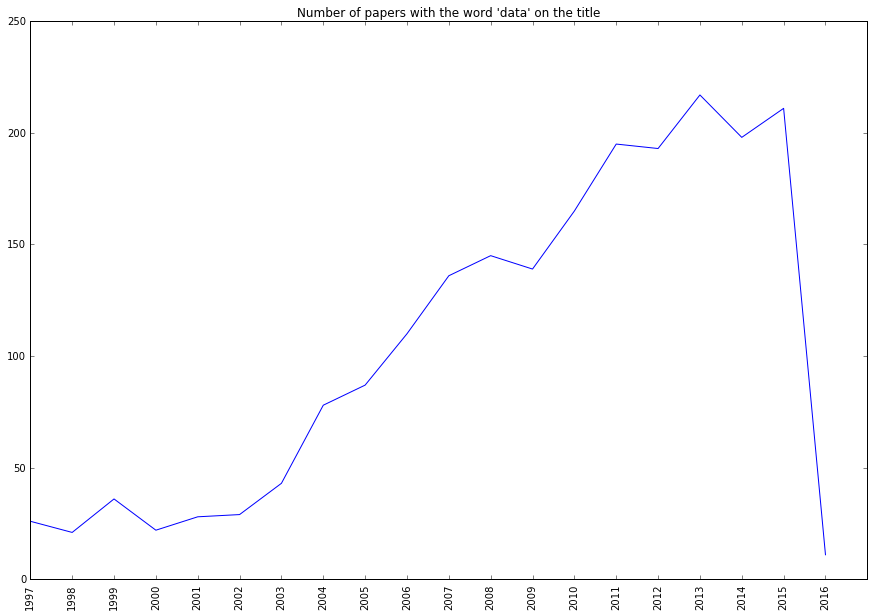

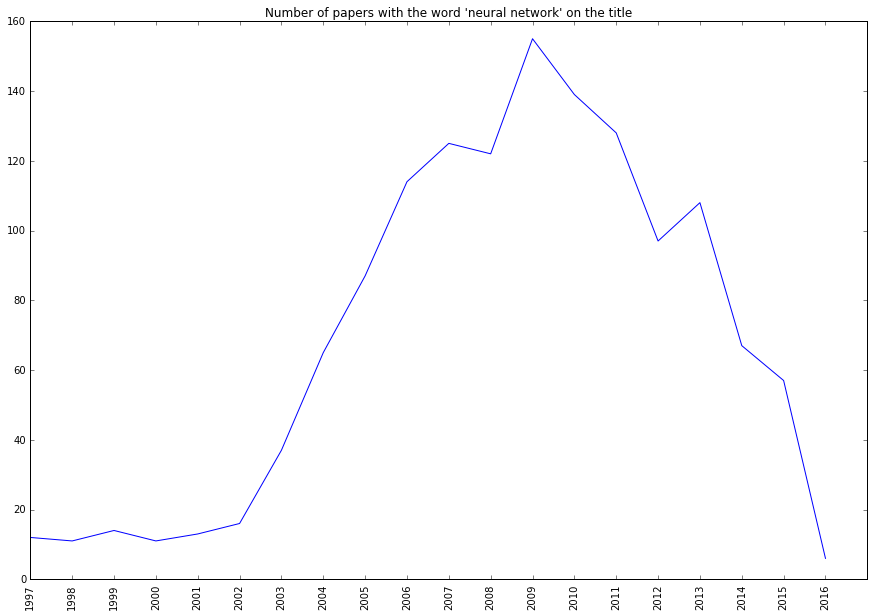

In [3]:
#Let us see and how many papers use the word data on their titles since 1997 (-20 years) and do the same for neural network.
#str.contains() can be used to check the existence of a string in another string

df_data = df_paper[df_paper['titleClean'].str.contains('data')]

years_data,paper_in_year_data = np.unique(df_data.year, return_counts=True)

plt.figure(figsize = (15,10))
plt.plot(paper_in_year_data[-20:])
plt.xticks(np.arange(20), years_data[-20:], rotation='vertical')
plt.title('Number of papers with the word \'data\' on the title')
plt.show()

df_nn = df_paper[df_paper['titleClean'].str.contains('neural network')]

years_nn,paper_in_year_nn = np.unique(df_nn.year, return_counts=True)

plt.figure(figsize = (15,10))
plt.plot(paper_in_year_nn[-20:])
plt.xticks(np.arange(20), years_nn[-20:], rotation='vertical')
plt.title('Number of papers with the word \'neural network\' on the title')
plt.show()

We can also draw them side by side with the same y-axis in order to better see the magnitude.

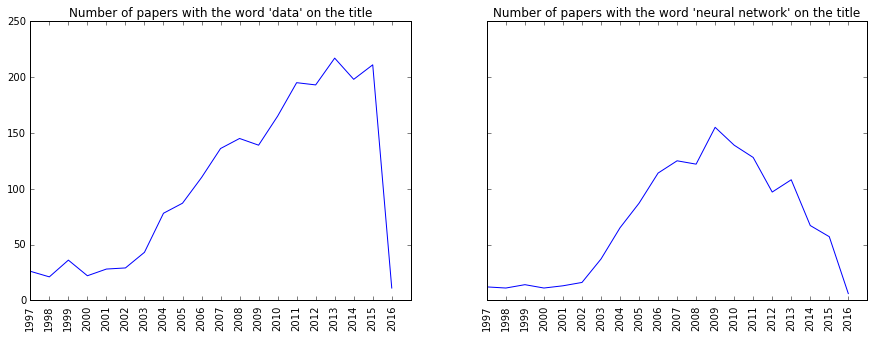

In [4]:
# Let us create two graphs with the same y axis in order to better visualize
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5), sharey=True)
ax1.plot(paper_in_year_data[-20:])
plt.sca(ax1)
plt.xticks(range(20), years_data[-20:], rotation = 'vertical')
ax1.set_title('Number of papers with the word \'data\' on the title')
plt.sca(ax2)

ax2.plot(paper_in_year_nn[-20:])
plt.xticks(range(20), years_nn[-20:], rotation = 'vertical')
ax2.set_title('Number of papers with the word \'neural network\' on the title')
plt.show()

# Term-document frequency

In text mining, the first step is usually to count how many times a word appears on each document of a corpus (here corpus is titles of papers).


## Term frequency - inverse document frequency

(https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Tf-Idf matrix shows how important a word is in a documentin a corpus. If a word is frequently used its importance for the document increases. However, if it is also frequently used in other documents, then its importance decreases.

## Count

We can also count how many times a word appears in each document of a corpus. Luckily we have both tools in **scikit-learn**.

In [5]:
#We create and examine tf-idf matrix and count matrix using the modules below.
#There is a huge number of documents, so we can use the first 1000.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

df_paper1 = df_paper.iloc[0:1000,:]
tdm = TfidfVectorizer(min_df=20, stop_words='english')
paper_term_document = tdm.fit_transform(df_paper1['titleClean'])
print(paper_term_document)
print(tdm.vocabulary_)

cv = CountVectorizer(min_df=20, stop_words='english')
paper_term_count_document = cv.fit_transform(df_paper1['titleClean'])
print(paper_term_count_document)
print(cv.vocabulary_)

  (0, 21)	1.0
  (1, 40)	0.649628995971
  (1, 4)	0.384795421606
  (1, 35)	0.655678771278
  (2, 24)	1.0
  (3, 28)	0.63525130329
  (3, 29)	0.772305497629
  (4, 7)	0.763106004429
  (4, 15)	0.646273336913
  (5, 15)	1.0
  (6, 32)	0.434281490616
  (6, 11)	0.411506568003
  (6, 27)	0.40656470562
  (6, 3)	0.391027294701
  (6, 25)	0.411506568003
  (6, 15)	0.393099314209
  (7, 41)	0.534115973489
  (7, 18)	0.845411217612
  (8, 38)	1.0
  (9, 23)	0.53134474058
  (9, 20)	0.571836876998
  (9, 15)	0.513746644121
  (9, 4)	0.356005250548
  (10, 37)	0.498673187311
  (10, 19)	0.635486896963
  :	:
  (989, 23)	0.362492595727
  (989, 15)	0.700973738333
  (989, 4)	0.24287295518
  (990, 1)	1.0
  (991, 1)	1.0
  (992, 9)	0.667770210103
  (992, 15)	0.744367480818
  (993, 32)	0.595315597429
  (993, 27)	0.557321267081
  (993, 29)	0.578785231945
  (994, 11)	0.652226561492
  (994, 15)	0.623051571875
  (994, 4)	0.43174906053
  (995, 1)	0.49777589363
  (995, 6)	0.54319658707
  (995, 20)	0.573987584481
  (995, 4)	0.357344

We apply KMeans algorithm on tf-idf matrix in order to find similar documents. The number of clusters are set arbitrarily, you can experiment with the number of clusters to see if the results are robust.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 60, n_init = 10, random_state=1)

kmeans.fit(paper_term_document)

labels = kmeans.predict(paper_term_document)

pd.options.display.max_colwidth = 120
pd.options.display.max_rows = 200
print("%1000s" % df_paper1.iloc[labels==labels[0],:]['titleClean'])

0                                                      heuristic optimization methods for generating test from a question bank
12                           speaker and corpus independent methods for affect classification in computational paralinguistics
109                                                                      a survey on use of soft computing methods in medicine
188    evaluation of a robot assisted rehabilitation system with assist as needed and visual error augmentation training me...
251                           proceedings of the international workshop on finite state methods in natural language processing
268        computing quadratic approximations for the isochrons of oscillators a general theory and advanced numerical methods
329                                  practical wireless network coding and decoding methods for multiple unicast transmissions
441                                                                                    benchmarking data mining

## Correlation Heat Map

We can also see how the words are correlated with each other. For this purpose, we calculate the correlation matrix for count matrix. Pandas has a useful ".corr()" method that we can use. It may make sense to transform matrix into a dataframe.

In [7]:
df_ptd = pd.DataFrame(paper_term_count_document.todense())

vocabulary = dict((v, k) for k, v in cv.vocabulary_.iteritems())
df_ptd.columns=vocabulary.items()
corr_mat = df_ptd.corr()

C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\byuceoglu\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


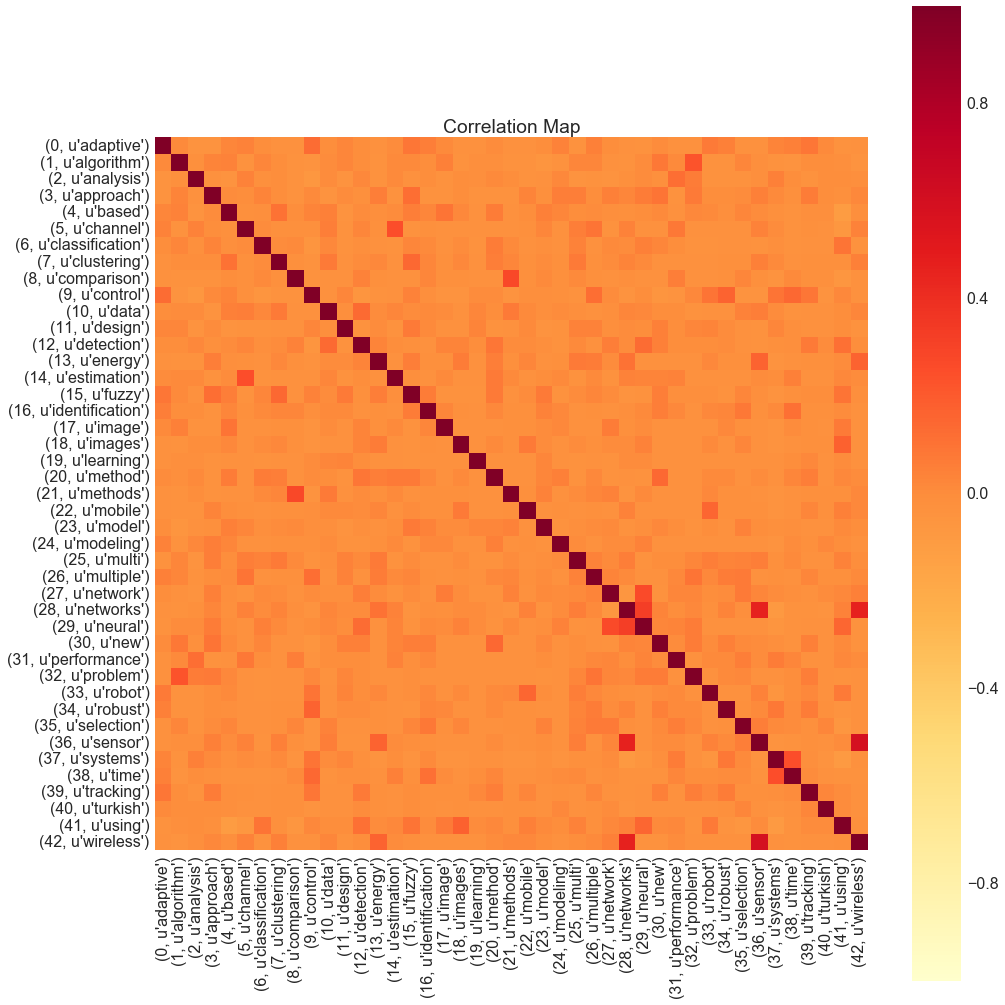

In [8]:
import seaborn as sns
sns.set(context="paper", font="arial", style = "whitegrid", font_scale=2.0)


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corr_mat, square=True, cmap = 'YlOrRd', xticklabels=df_ptd.columns, yticklabels=df_ptd.columns)
f.tight_layout()
plt.title('Correlation Map')
plt.legend(fontsize=14)

(1000L, 43L)


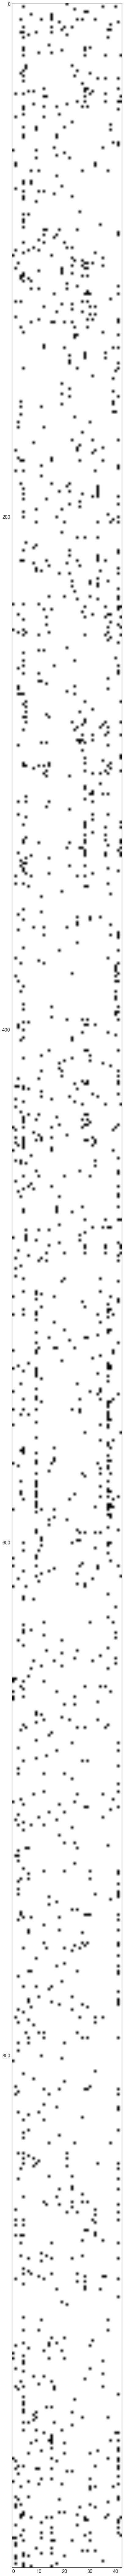

In [9]:
sns.set(context="paper", font="arial", style = "white", font_scale=2.0)

df_paper1 = df_paper.iloc[:1000,:]
cv = TfidfVectorizer(min_df=20, stop_words='english')
paper_term_count_document = cv.fit_transform(df_paper1['titleClean'])

PDT = paper_term_count_document.todense()
PDT[PDT >0] = 1

print(np.shape(PDT))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,150))
plt.imshow(1-PDT, cmap=plt.cm.gray)
plt.show()

# Further Applications

So far we only used paper titles in our analysis. We can also consider doing similar works for authors. For paper "0000197A" we check the author information and see that there are 3 authors.

In [10]:
print(df_affiliation[df_affiliation.PaperID == '0000197A'])
print(df_paper[df_paper.paperID == '0000197A'])

        PaperID Author_ID Affiliation_ID
70969  0000197A  789B8F40       09B2EB2C
78131  0000197A  788833D1       09B2EB2C
78549  0000197A  8197BC68       09B2EB2C
        paperID  \
77297  0000197A   

                                                                                    titleClean  \
77297  improved secret image sharing method by encoding shared values with authentication bits   

       year journal  
77297  2011     NaN  


We have to merge the two tables in order to get the desired structure.

In [11]:
print(df_affiliation.columns)
print(df_paper.columns)

df_affiliation.columns=['paperID', 'authorID', 'affiliationID']

#Merge the two dataframes using merge method in pandas.

result = pd.merge(df_paper, df_affiliation, how = 'inner', on='paperID')
print(result[result.paperID == '0000197A'])

Index([u'PaperID', u'Author_ID', u'Affiliation_ID'], dtype='object')
Index([u'paperID', u'titleClean', u'year', u'journal'], dtype='object')
         paperID  \
189471  0000197A   
189472  0000197A   
189473  0000197A   

                                                                                     titleClean  \
189471  improved secret image sharing method by encoding shared values with authentication bits   
189472  improved secret image sharing method by encoding shared values with authentication bits   
189473  improved secret image sharing method by encoding shared values with authentication bits   

        year journal  authorID affiliationID  
189471  2011     NaN  789B8F40      09B2EB2C  
189472  2011     NaN  788833D1      09B2EB2C  
189473  2011     NaN  8197BC68      09B2EB2C  


Now, we can do similar work on individual authors.